### Cargar los datos y las librerías

> **¿Qué es un archivo `csv`?**
> 
> Un archivo csv (Comma-Separated Values) es un tipo de archivo de texto plano que almacena datos tabulares, es decir, datos dispuestos en filas y columnas. Cada fila en el archivo representa un registro o una fila de datos, y cada columna representa un campo o característica de los datos. Los valores en cada fila están separados por comas, de ahí el nombre "Comma-Separated Values". Este formato es ampliamente utilizado para el intercambio de datos entre diferentes sistemas y aplicaciones debido a su simplicidad y compatibilidad con una amplia gama de software, incluyendo hojas de cálculo como Microsoft Excel y programas de análisis de datos como Python con la biblioteca Pandas.
> 
> Los archivos csv son especialmente útiles en el campo de la ciencia de datos y el análisis de datos porque permiten una fácil importación y exportación de datos para su procesamiento y análisis. Por ejemplo, en Python, la biblioteca Pandas proporciona la función read_csv() para leer archivos csv y convertirlos en DataFrames, que son estructuras de datos bidimensionales que permiten el manejo y análisis de datos de manera eficiente.

In [34]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [36]:
trainset = pd.read_csv( 'database/house-prices-train.csv' )
testset = pd.read_csv( 'database/house-prices-test.csv' )

trainset.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


> **Función `describe()` de `pandas`**
>
> Genera estadísticas descriptivas de las columnas numéricas en un DataFrame. Cuando se aplica a un DataFrame que se ha creado a partir de un archivo CSV utilizando `read_csv()`, proporciona un resumen estadístico de las columnas numéricas, incluyendo el conteo, la media, la desviación estándar, los valores mínimos y máximos, y los cuartiles

In [32]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,pred,diff,cuad
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,181855.643836,934.447945,3.186420e+09
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,63057.646011,56459.985533,1.043697e+10
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,40080.000000,-327977.000000,0.000000e+00
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,135540.000000,-23750.000000,1.607824e+08
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,175680.000000,-148.500000,7.049034e+08
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,213210.000000,31135.000000,2.444808e+09
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,677040.000000,517040.000000,2.673304e+11


**Explicación del resultado**

`count` $\to$ significa la cantidad de datos 

`mean` $\to$ media

`std` $\to$ desviación estándar

`min` $\to$ valor mínimo

`max` $\to$ valor máximo

`25%` $\to$ valor de la posición del primer cuartil 

`50%` $\to$ valor de la posición del segundo cuartil o mediana 

`75%` $\to$ valor de la posición del tercer cuartil 

### Cuartiles y Percentiles
Se utilizan para describir la posición de un dato específico con respecto al resto de los datos cuando están en orden por categorías

- El primer cuartil es el valor por debajo del cual se encuentra el 25% de los datos. Indica el valor más bajo que no es menor que el 25% de los datos. 
- El segundo cuartil o mediana es el valor central de un conjunto de datos
- El tercer cuartil es el valor por debajo del cual se encuentra el 75% de los datos. Específicamente, indica el valor más bajo que no es menor que el 75% de los datos

Los percentiles son puntos que dividen un conjunto de datos en 100 partes iguales. Cada percentil representa el valor por debajo del cual se encuentra un porcentaje específico de los datos. 

> Para calcular el percentil es ordenar los valores de la tabla y coger el valor que se encuentra en la posición que cae al calcular el porciento
> 

### Desviación Estándar
Es un número que describe cuán dispersas están las observaciones

In [38]:
std = np.std( trainset[ ['SalePrice'] ], axis=0 )
std

SalePrice    79415.291886
dtype: float64

### Coeficiente de Variación
Se utiliza para tener una idea de qué tan grande es la desviación estándar. El coeficiente de variación se expresa en porcentaje y proporciona una medida de cuánto varína los datos en una relación con su media. 

Este se calcula con: $cv = std/mean$ 

In [40]:
cv = np.std( trainset[ ['SalePrice'] ], axis=0 ) / np.mean( trainset[ ['SalePrice'] ] )
cv

SalePrice    0.43895
dtype: float64

### Varianza


## Regresión Lineal Simple

### Desarrollo

In [3]:
trainset[ ['GrLivArea', 'SalePrice'] ].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


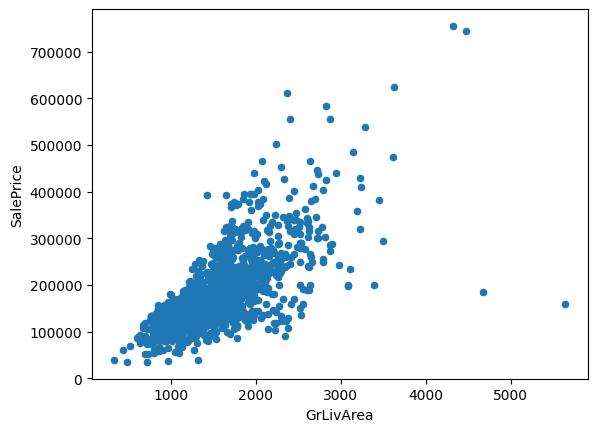

In [4]:
trainset.plot.scatter( x='GrLivArea', y='SalePrice' )
plt.show()

Esta gráfica de datos podría definirse como un primer modelo de regresión (simple). En esta se puede trazar una recta y definir que existe un error. El error viene dado por la diferencia del valor de la recta y el valor correcto. Tomando la suma de estos errores y dividiendolo por la cantidad de errores existentes tenemos el *error cuadrático medio* (ECM)

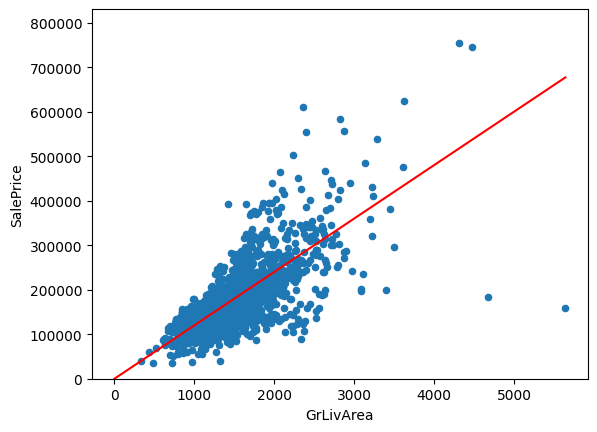

In [5]:
# Parámetros de la recta
w = 120
b = 0

# Puntos de la recta 
x = np.linspace(0, trainset['GrLivArea'].max(), 100)
y = w*x + b

# Gráfica de la recta
trainset.plot.scatter(x='GrLivArea', y='SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0, trainset['SalePrice'].max()*1.1)

plt.show()

### Cálculo de Predicciones (1er)


In [8]:
# Si escogemos esos parametros para el modelo cuál es el error? 

# calculo de las predicciones
trainset['pred'] = trainset['GrLivArea']*w+b

# calculo de la funcion de error 
trainset['diff'] = trainset['pred']-trainset['SalePrice']
trainset['cuad'] = trainset['diff']**2
trainset[ ['GrLivArea', 'SalePrice', 'pred', 'diff', 'cuad'] ].head()

,GrLivArea,SalePrice,pred,diff,cuad
0,1710,208500,205200,-3300,10890000
1,1262,181500,151440,-30060,903603600
2,1786,223500,214320,-9180,84272400
3,1717,140000,206040,66040,4361281600
4,2198,250000,263760,13760,189337600


### Usando sklearn para el 2do cálculo de predicciones

In [10]:
# definiendo input y output
X_train = np.array(trainset[ 'GrLivArea' ]).reshape((-1, 1))
Y_train = np.array(trainset[ 'SalePrice' ])

# creando modelo
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

intercept = model.intercept_
coef = model.coef_

# imprimiendo parametros
print(f"intercepto (b): {intercept}")
print(f"pendiente (w): {coef}")

intercepto (b): 18569.025856487307
pendiente (w): [107.13035897]


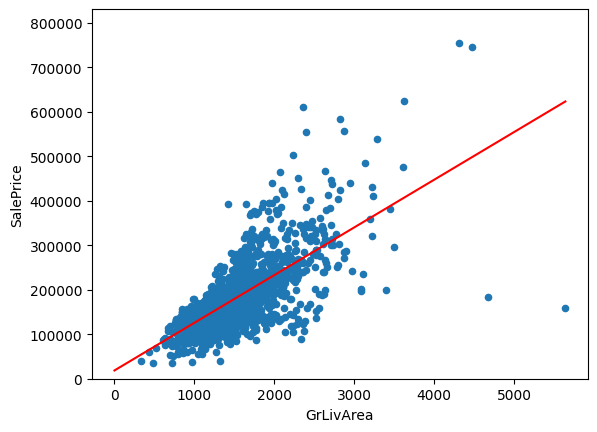

In [11]:
x = np.linspace(0, trainset['GrLivArea'].max(), 100)
y = coef*x + intercept

# Gráfica de la recta
trainset.plot.scatter(x='GrLivArea', y='SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0, trainset['SalePrice'].max()*1.1)

plt.show()

## FAG

### Regresión Lineal

Este se usa para intentar encontrar la relación entre las variables. La línea que se obtiene a través de la regresión lineal se llama línea de regresión. La idea es que esta línea representa la relación entre las variables de manera que la suma de las diferencias entre los valores observados y los valores predichos por la línea de regresión sea lo más chica posible

### Método de los mínimos cuadrados
Este método es utilizado para encontrar la mejor línea de ajuste (o modelo) que se ajuste a un conjunto de datos. Este método es método en regresión lineal se utiliza para minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo  

## Análisis de los Supuestos

### Supuesto de Homocedasticidad 

La prueba de Breusch-Pagan es una forma de comprobar si existe heterocedasticidad en el análisis de regresión. Una prueba de Breusch-Pagan sigue las siguientes hipótesis:
- **Hipótesis nula:** Significa que la homocedasticidad está presente.
- **Hipótesis alternativa:** Significa que la homocedasticidad no está presente (es decir, existe heterocedasticidad)

In [18]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [13]:
# Creando un conjunto de datos
dataframe = pd.DataFrame({
  'rating': [92, 84, 87, 82, 98, 94, 75, 80, 83, 89],
  'points': [27, 30, 15, 26,27, 20, 16, 18,19, 20],
  'runs': [5000, 7000, 5102, 8019, 1200, 7210, 6200, 9214, 4012, 3102],
  'wickets': [110, 120, 110, 80, 90, 119, 116, 100, 90, 76]
})

In [14]:
# Ajustar el modelo de regresión lineal múltiple
fit = smf.ols('rating ~ points + runs + wickets', data=dataframe).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1.732
Date:                Wed, 31 Jul 2024   Prob (F-statistic):              0.259
Time:                        10:32:14   Log-Likelihood:                -29.974
No. Observations:                  10   AIC:                             67.95
Df Residuals:                       6   BIC:                             69.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.4786     16.182      4.911      0.0

c:\Users\Zkorpion\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
# Obtener resultados del test
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 4.364731073633534),
 ('p-value', 0.22467800092772772),
 ('f-value', 1.5490764081237363),
 ('f p-value', 0.2961919661957098)]

Dado que el valor $p$ es mayor que 0.05, no podemos rechazar la hipótesis nula. Por tanto, no tenemos pruebas suficientes para decir que la heteroscedasticidad está presente en el modelo de regresión 

#### Información de la Tabla de Regresión
##### Básicos
- `Dep. Variable` $\to$ Sería la variable dependiente. En la tabla sería `Calorie_Burnage`. La variable dependiente se explica aquí mediante `Average_Pulse`
- `Model` $\to$ OLS es Ordinary Least Squares. 
- `Date` and `Time` $\to$ Muestra la fecha y la hora de salida que fue calculado en Python

##### Seción de Coeficientes
- `coef` $\to$ es la abreviatura de coeficiente. Están las salidas de la función de la regresión lineal 
- `Intercept` y `Average_Pulse` en `coef` $\to$ hace que la función de regresión lineal pueda reescribirse de la siguiente forma: 
$$Calorie\_Burnage = 0.3296 * Average\_Pulse + 348.8662$$ 
Esos números significan que si Average_Pulse se incrementa en 1, Calorie_Burnage se incrementa en 0.3296 (0.3 redondeado). Si Average_Pulse = 0, the Calorie_burnage es igual a 346.8662 (346.9 redondeado). 
- `Intercept` es usada para ajustar el modelo de precisión de la predición 

##### Seción de las Estadísticas de los Coeficientes 
Esta seción sirve para testear si los componentes de la función de regresión lineal tiene un impacto significativo en la variable dependiente (`Calorie_Burnage`). En otras palabras, probar si existe una relación entre `Average_Pulse` y `Calorie_Burnage`, usando las pruebas de estadística

**Existen 4 componentes que explican las estadísticas de los coeficientes**
- `str err` que sería el error estándar 
- `t` que sería el valor `t` del coeficiente 
- `P>|t|` que sería el valor `P`
- `[0.025 0.975]` representa el intervalo de confianza de los coeficientes

##### El valor `P`
El valor `P` es el valor `p` asociado con el coeficiente de una variable independiente en el modelo. Este valor `p` es el resultado de una prueba de hipótesis que se utiliza para determinar si el coeficiente de la variable independiente es significativamente diferente de 0. El valor `P` ayuda a responder la pregunta de si la variable independiente tiene un efecto significativo sobre la variable dependiente. 

Este valor se calcula utilizando los residuos del modelo y los coeficientes estimados. Un valor `p` bajo ($< 0.05$) indica que es muy poco probable que el coeficiente observado se deba al azar, lo que sugiere que hay una relación significativa entre la variable independiente y la variable dependiente. 

Un valor `p` alto ($> 0.05$) indica que no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente es igual a cero, lo que sugiere que la variable independiente no tiene un efecto significativo sobre la variable dependiente 

> Si el valor `P` es alto también puede llamarse valor `P` insignificante

##### `R-squared` y `Adj. R-squared`
`R-squared` es una medida estadística que indica la proporción de la variación en la variable dependiente que es explicada por la(s) variable(s) independiente(s) en el modelo. Es el coeficiente de determinación, que mide qué tan bien el modelo de regresión lineal se ajusta a los datos. 

Este valor varía entre 0 y 1, donde: 
- El valor de 0 indica que el modelo no explica ninguna de las variaciones en la variable dependiente 
- El valor de 1 indica que el modelo explica todas las variaciones en la variable dependiente 
- Un valor entre 0 y 1 indica la proporción de la variación dependiente que es explicada por el modelo

**Ejemplo:** un valor de $0.85$ significa que el 85% de la variación en la variable dependiente puede ser explicada por las variables independientes en el modelo 

> Que el modelo de regresión lineal no explica ninguna de las variaciones en la variable dependiente, significa que el modelo de regresión lineal no puede predecir o explicar ningún cambio o variación en los valores de la variable dependiente basándose en los valores de las variables independientes. El modelo no tiene ninguna relación entre las variables independientes y la variable dependiente 

Que el valor sea 0 puede ser resultado de varias situaciones: 
- *Variables independientes irrelevantes:* las variables independientes seleccionadas no tienen ninguna relación con la variable dependiente. Esto podría deberse a que las variables independientes no son predictivas de la variable dependiente o que no se han seleccionado adecuadamente 
- *Errores en la recopilación de datos:* puede haber errores en la recopilación de datos que hacen que las variables independientes no estén relacionadas con la variable dependiente 
- *Modelo incorrecto:* el modelo de regresión lineal no es el más adecuado para los datos. 

### Modelo OLS 
OLS significa Ordinary Least Squares (Mínimos Cuadrados Ordinarios). En el contexto de una tabla de regresión lineal, el modelo OLS es un método estadístico utilizado para estimar los parámetros de una regresión lineal, como la pendiente y la intersección en el eje `y`, basándose en el conjunto de datos observado. 

El objetivo del modelo es minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Esto se logra encontrando la línea que mejor se ajusta a los datos, es decir, la línea que minimiza la distancia total entre los puntos de datos y la línea 

### Otros modelos
**Regresión de mínimos cuadrados generalizados (GLS):** este modelo es una extensión del modelo OLS que permite manejar errores con varianzas diferentes y autocorrelacionados. Para hacer esto se ajusta una matriz de pesos a los residuos del modelo OLS, lo que resulta en una estimación más precisa de los parámetros 

**Regresión de mínimos cuadrados robustos (RMS):** modelo similar a OLS, pero utiliza una técnica de estimación de parámetros que es robusta a los errores autocorrelacionados y errores con varianzas diferentes

**Regresión de mínimos cuadrados de mínimos residuos (MMR):** modelo que busca minimizar no solo la suma de los cuadrados de los residuos, sino también la suma de los cuadrados de los residuos ponderados por el inverso de la varianza de los errores. Esto puede ser útil cuando los errores tienen una varianza que varía con los valores de `x`

**Regresión de mínimos cuadrados de mínimos residuos con ponderación (WMMR):** similar al MMR, pero utiliza una ponderación adicional para los residuos, lo que mejora la precisión de la estimación de los parámetros en ciertos casos 

**Regresión de mínimos cuadrados de mínimos residuos con ponderación de peso (WWMMR):** modelo, que es una extensión del WMMR, que utiliza una ponderación adicional basada en el peso de los residuos, lo que puede mejorar aún más la precisión de la estimación de los parámetros 

### Supuesto de Independencia
Tenemos un dataset que describe 10 jugadores de baloncesto

In [22]:
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

In [17]:
# Creando un conjunto de datos
df = pd.DataFrame({
    'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
    'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
    'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
    'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]
})
print(df)

   rating  points  assists  rebounds
0      90      25        5        11
1      85      20        7         8
2      82      14        7        10
3      88      16        8         6
4      94      27        5         6
5      90      20        7         9
6      76      12        6         6
7      75      15        9        10
8      87      14        9        10
9      86      19        5         7


Supongamos que ajustamos un modelo de regresión lineal múltiple utilizando la `rating` como variable dependiente y las otras 3 como variables independientes

In [21]:
#fit multiple linear regression model
model = ols('rating ~ points + assists + rebounds', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Wed, 31 Jul 2024   Prob (F-statistic):             0.0995
Time:                        10:35:19   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

c:\Users\Zkorpion\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Ahora podemos aplicar la prueba de Durbin-Watson que trae la biblioteca `statsmodels` para determinar si los residuos del modelo de regresión están autocorrelacionados 

In [23]:
#perform Durbin-Watson test
durbin_watson(model.resid)

2.3920546872335353

El estadístico de la prueba es 2.392 y dado que está dentro del rango de 1.5 y 2.5 consideraríamos que la autocorrelación no es problemática en este modelo de regresión. 

### Supuesto de Linealidad en parámetros: Prueba de RESET de Ramsey 

In [24]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd

In [25]:
houseprices = sm.datasets.get_rdataset(dataname="HousePrices", package="AER", cache=True).data
print(houseprices.iloc[:, 0:3].head())

   price  lotsize  bedrooms
0  42000     5850         3
1  38500     4000         2
2  49500     3060         3
3  60500     6650         3
4  61000     6360         2


A continuación ajustamos el modelo `ols` utilizando variables dentro del objeto de datos `houseprices` y almacenamos los resultados dentro del objeto `mlr`. Dentro `ols`, la fórmula del parámetro se ajusta al modelo. 

In [26]:
mlr = smf.ols(formula="price ~ lotsize + bedrooms", data=houseprices).fit()

Finalmente hacemos la prueba RESET de Ramsey 

In [27]:
resettest = smd.linear_reset(res=mlr, power=2, test_type="fitted", use_f=True)
print(resettest)

<F test: F=10.634627447787777, p=0.001179652214823055, df_denom=542, df_num=1>


### Supuesto de Normalidad: Kolmogorov-Smirnov

Esta prueba determina si dos muestras son significativamente diferentes entre sí. 

El estadístico de Kolmogorov-Smirnov cuantifica una distancia entre la función de distribución empírica de la muestra y la función acumulativa de la distribución de referencia, o entre las funciones de distribución empírica de dos muestras

La hipótesis nula supone que los números están distribuidos uniformemente entre 0-1

In [28]:
from scipy.stats import kstest
import random

# N = int(input("Enter number of random numbers: "))
N = 5

actual =[]
print("Enter outcomes: ")
for i in range(N):
	# x = float(input("Outcomes of class "+str(i + 1)+": "))
	actual.append(random.random())

print(actual)
x = kstest(actual, "uniform") 
print(x)

Enter outcomes: 
[0.7917109192107169, 0.3397822111483968, 0.5443898528514236, 0.4239004035743661, 0.09645195097545078]
KstestResult(statistic=0.25561014714857644, pvalue=0.8268167379800992, statistic_location=0.5443898528514236, statistic_sign=1)


**KS Test** es una forma de diferenciar automáticamente muestras de una distribución diferente. La función también se puede utilizar para comprobar si los datos proporcionados siguen la distribución normal o no. Por lo tanto, la hipótesis nula supone que los números siguen la distribución normal 

In [29]:
N = 10

actual =[]
print("Enter outcomes: ")

for i in range(N):
	# x = float(input("Outcomes of class "+str(i + 1)+": "))
	actual.append(random.random())

print(actual)
x = kstest(actual, "norm") 
print(x)

Enter outcomes: 
[0.46321338815548685, 0.5423389583949079, 0.8104663172506511, 0.8409409470603031, 0.3836540843229165, 0.7570610247850467, 0.025479774686909762, 0.5031814461154626, 0.3572151142712241, 0.3978029373587424]
KstestResult(statistic=0.5395346141003342, pvalue=0.00298567458635222, statistic_location=0.3572151142712241, statistic_sign=-1)


### Supuesto de Normalidad: Shapiro-Wilk

El método `shapiro` tiene como parámetros
- `x`: Matrix de datos de muestra 

Retorna los siguientes valores:
- `estadística`: Estadística de prueba 
- `valor p`: El valor $p$ para la prueba de hipótesis

La hipótesis nula dice: *la muestra proviene de distribuciones normales*

En este ejemplo se va a realizar una prueba de Shapiro-Wilk en los datos generados aleatoriamente con 500 puntos de datos

In [30]:
# import useful library
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn

# Create data
gfg_data = randn(500)

# conduct the Shapiro-Wilk Test
shapiro(gfg_data)

ShapiroResult(statistic=0.9980829726812288, pvalue=0.8541894275329083)

Dado que en el ejemplo anterior, el valor $p$ es 0.98, que es mayor que el umbral (0.05), entonces no podemos rechazar la hipótesis nula, es decir, no tenemos evidencia suficiente para decir que la muestra no viene de una distribución normal 

Realizar una prueba de Shapiro-Wilk a datos generados aleatoriamente a partir de los datos de distribución de Poisson con 100 puntos de datos 

In [31]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn

seed(0)
# Create data
gfg_data = poisson(5, 200)

# conduct the Shapiro-Wilk Test
shapiro(gfg_data)

ShapiroResult(statistic=0.966902132312346, pvalue=0.00011927794577221817)

Dado que en el ejemplo anterior, el valor $p$ es 0.0001 rechazamos la hipótesis nula, es decir, tenemos evidencia suficiente para decir que la muestra no proviene de una distribución normal 